# Projek Pertama Machine Learning Terapan - Mohamed

## Latar belakang

Dalam dunia medis, pemantauan kesehatan janin selama kehamilan merupakan aspek penting untuk mencegah komplikasi yang dapat membahayakan ibu maupun janin. Salah satu metode pemantauan yang umum dilakukan adalah melalui kardiotokografi (CTG), yang merekam denyut jantung janin dan kontraksi rahim. Namun, interpretasi data CTG secara manual oleh tenaga medis bisa sangat subjektif dan bervariasi.

Menurut World Health Organization (WHO), sekitar 2,4 juta bayi meninggal pada bulan pertama kehidupan setiap tahunnya, banyak di antaranya dapat dicegah dengan pemantauan dan penanganan kehamilan yang lebih baik \[1]. Model klasifikasi otomatis berbasis machine learning dapat membantu mengidentifikasi kondisi janin sebagai "normal", "suspect", atau "pathological", sehingga dokter dapat mengambil tindakan yang tepat lebih cepat.

Oleh karena itu, untuk mengurangi resiko dari meninggalnya bayi , maka diperlukan penerapan machine learning dalam klasifikasi kesehatan janin dapat membantu meningkatkan akurasi diagnosis dan efisiensi kerja dokter.

merujuk pada penelitian yang serupa dilakukan oleh (Mehbodniya, 2022) dan (Salini , 2024), ditemukan bahwa penerapan machine learning dapat memberikan prediksi dengan akurasi yang cukup menjanjikan  yang diukur berdasarkan metrik akurasi , presisi, skor f1, dan recall. yang menandakan bahwa penggunaan Machine learning dapat meningkatkan akurasi dari diagnosia kondisi kesehatan janin berdasarkan hasil CTG.



In [40]:
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report ,f1_score , precision_score, recall_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


# Data Loading

Dataset yang digunakan merupakan dataset yang berasal dari kaggle, yang diterbitkan oleh andrewmvd dengan judul fetal health classification. Dataset ini memiliki 2126 kolom dengan total 22 fitur yang terdiri dari 21 fitur independen dan 1 fitur dependen atau label.

In [41]:
# Download latest version
path = kagglehub.dataset_download("andrewmvd/fetal-health-classification")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/fetal-health-classification


In [42]:
DATA_DIR = f'{path}/{os.listdir(path)[0]}'
df = pd.read_csv(DATA_DIR)

# Exploratory Data Analysis (EDA)

## Melihat kolom dan tipe data dari kolom pada dataset

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

## Melihat 5 data teratas pada Dataset

In [44]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


# Melihat statistik

In [45]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


## Membuat visualisasi boxplot untuk mengidentifikasi Outlier pada tiap kolom dalam dataset

5 5


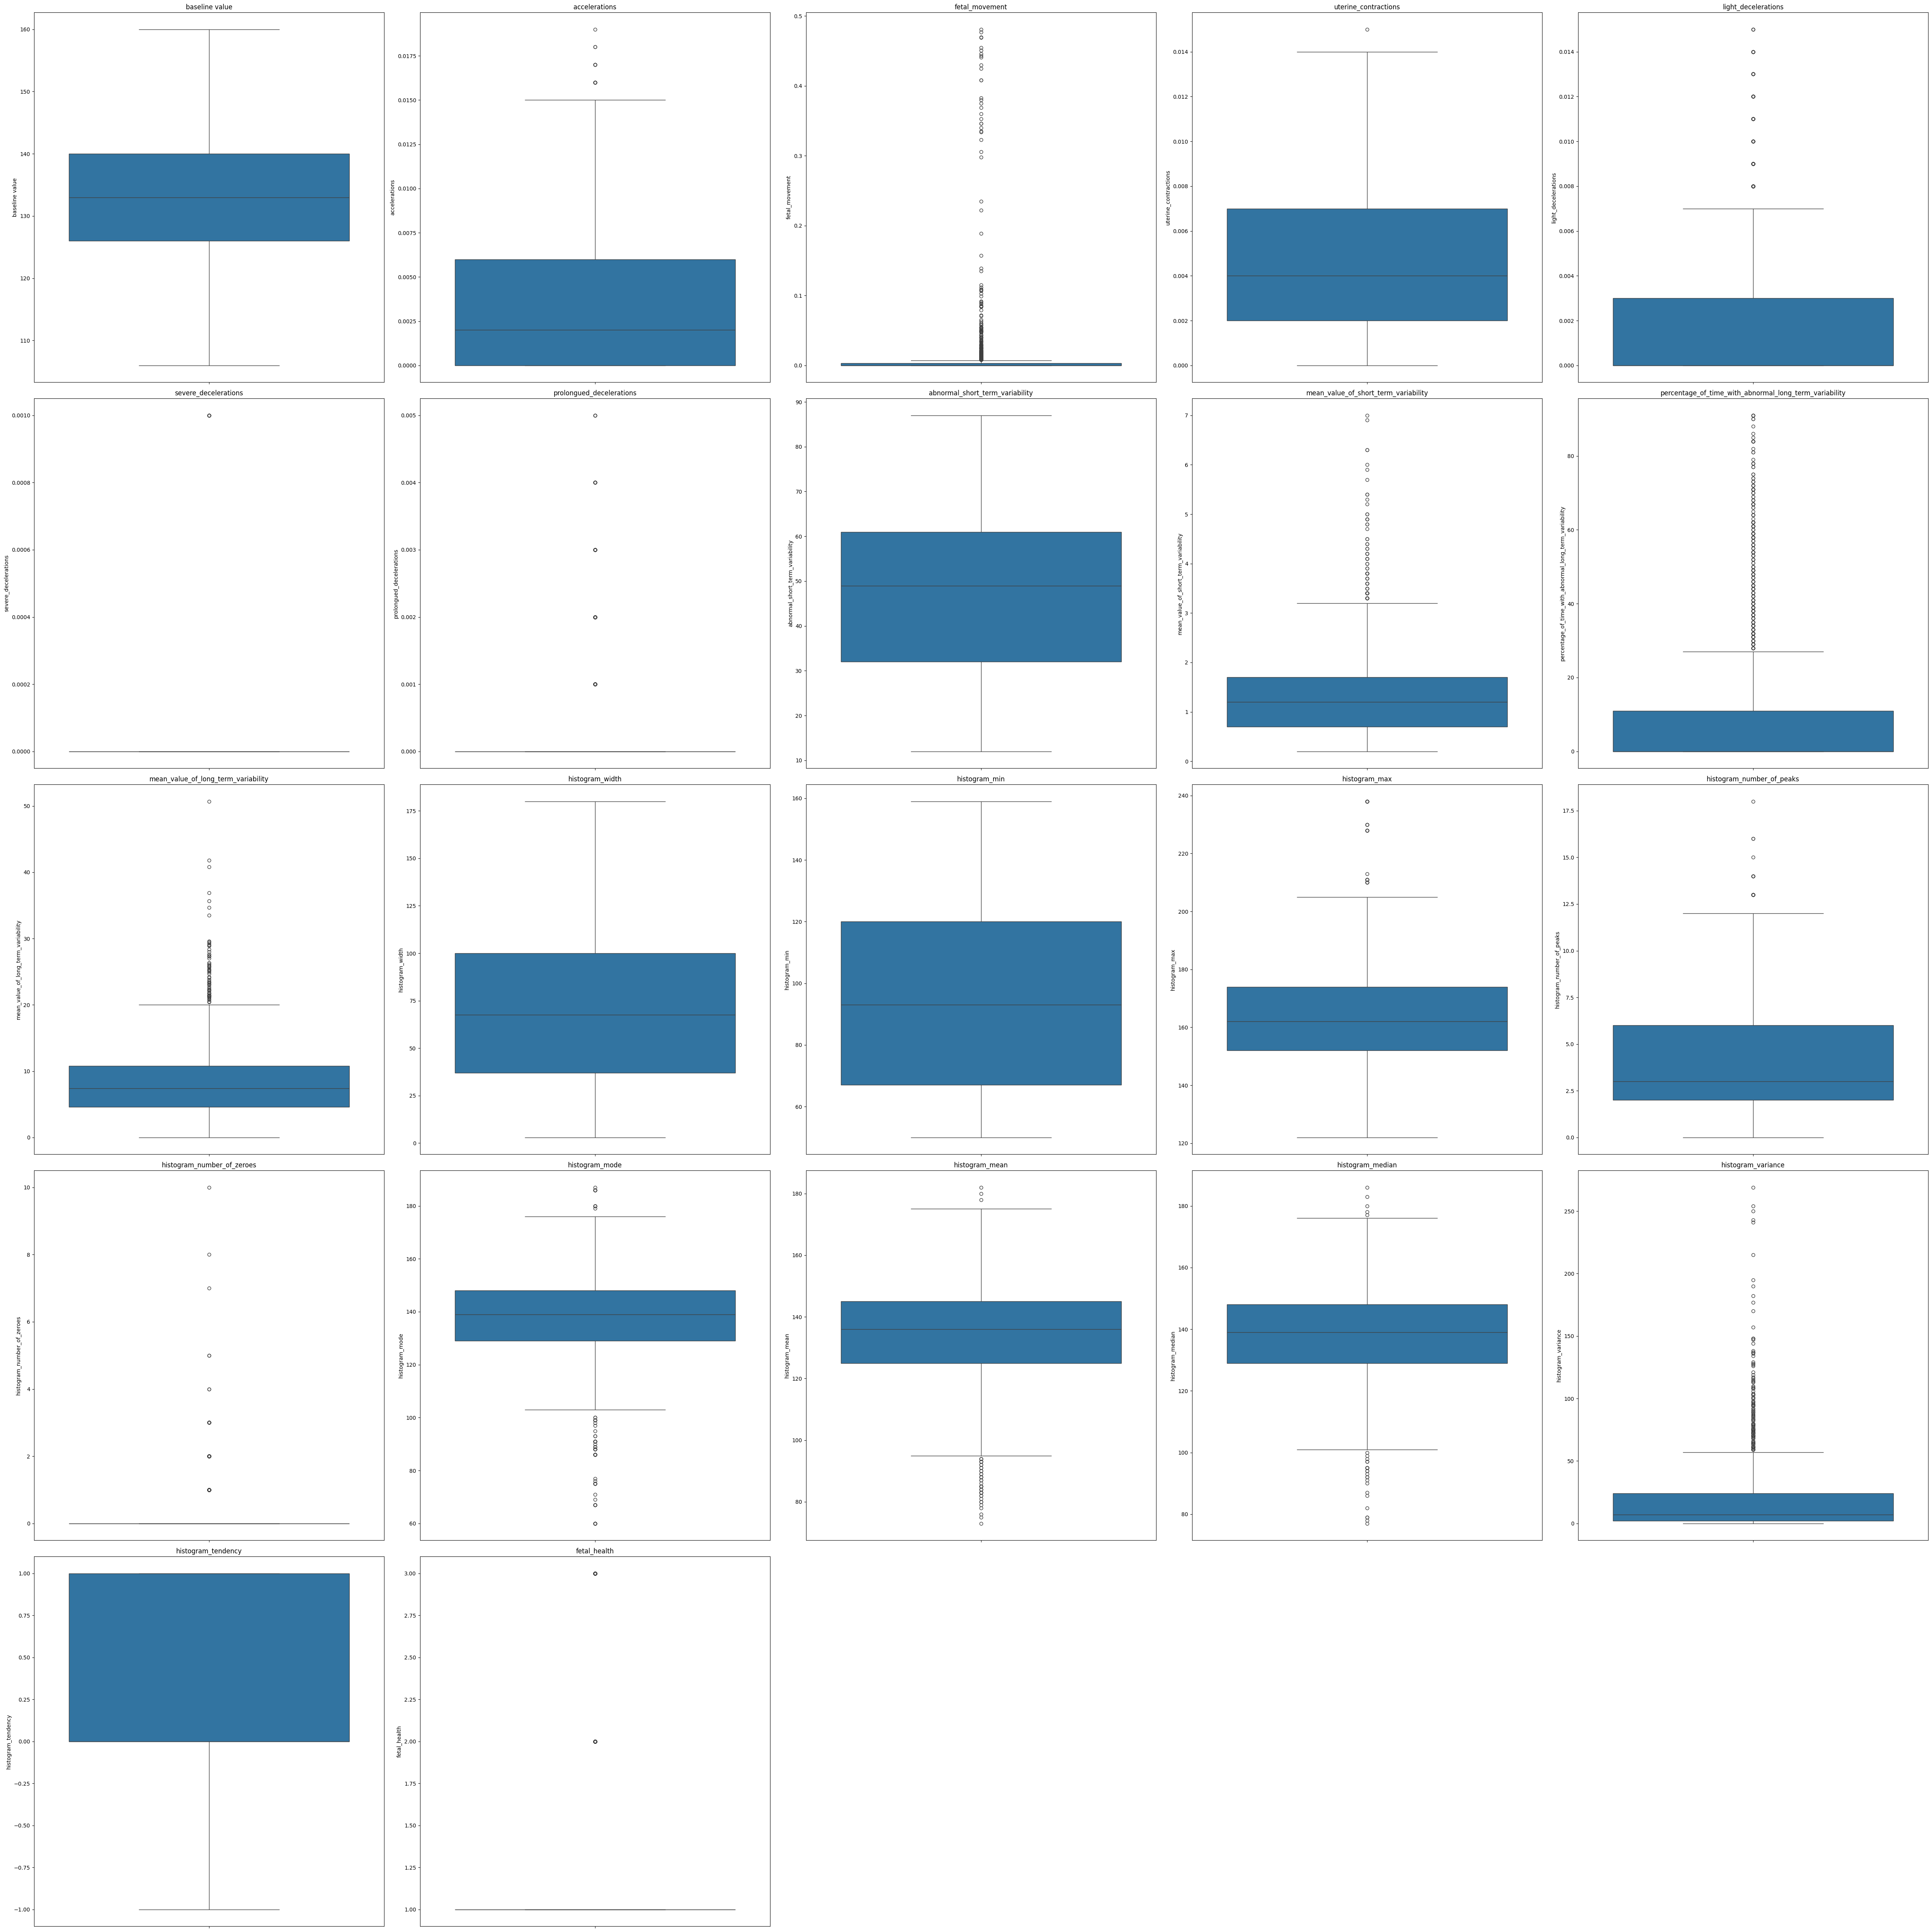

In [46]:
def show_boxplots(df):
  rows = int(np.ceil(np.sqrt(len(df.columns))))
  cols = int(np.ceil(len(df.columns) / rows))
  print(rows,cols)
  fig, ax = plt.subplots(rows, cols, figsize=(10*cols, 10*rows))
  ax = ax.flatten()
  for (idx , feature) in enumerate(df.columns):
    sns.boxplot(df[feature], ax=ax[idx])
    ax[idx].set_title(feature)

  for j in range(idx + 1, len(ax)):
      fig.delaxes(ax[j])
  plt.tight_layout()
  plt.show()

show_boxplots(df)

## Mengecek nilai kosong di dalam setiap kolom pada dataset

In [47]:
df.isna().sum()

,0
baseline value,0
accelerations,0
fetal_movement,0
uterine_contractions,0
light_decelerations,0
severe_decelerations,0
prolongued_decelerations,0
abnormal_short_term_variability,0
mean_value_of_short_term_variability,0
percentage_of_time_with_abnormal_long_term_variability,0


## Mengecek nilai duplikat pada setiap kolom di dalam dataset

In [48]:
df.duplicated().sum()


np.int64(13)

## Menghapus nilai duplikat dari dalam dataset

In [49]:
df.drop_duplicates(inplace=True)

## Membuat Pie Chart untuk visualisasi distribusi kelas atau label pada dataset

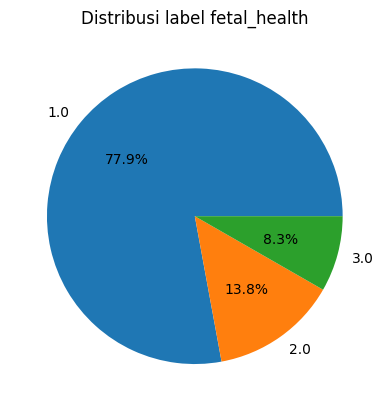

In [50]:
plt.pie(df['fetal_health'].value_counts(), labels = df['fetal_health'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribusi label fetal_health')
plt.show()

## Membuat Bar Chart untuk visualisasi distribusi kelas atau label pada dataset

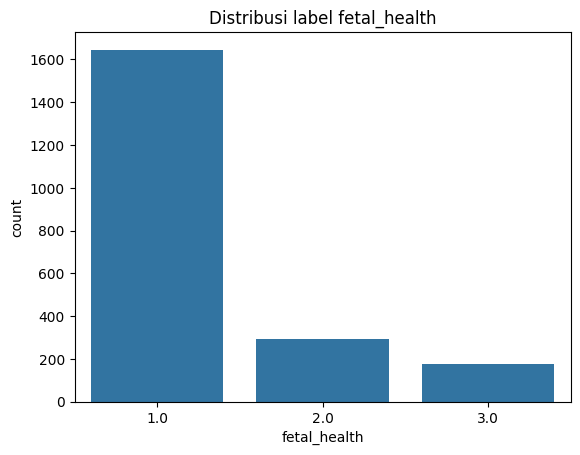

In [51]:
sns.countplot(x='fetal_health', data=df)
plt.title('Distribusi label fetal_health')
plt.show()

## Membuat Heat map untuk visualisasi korelasi antar kolom dalam dataset

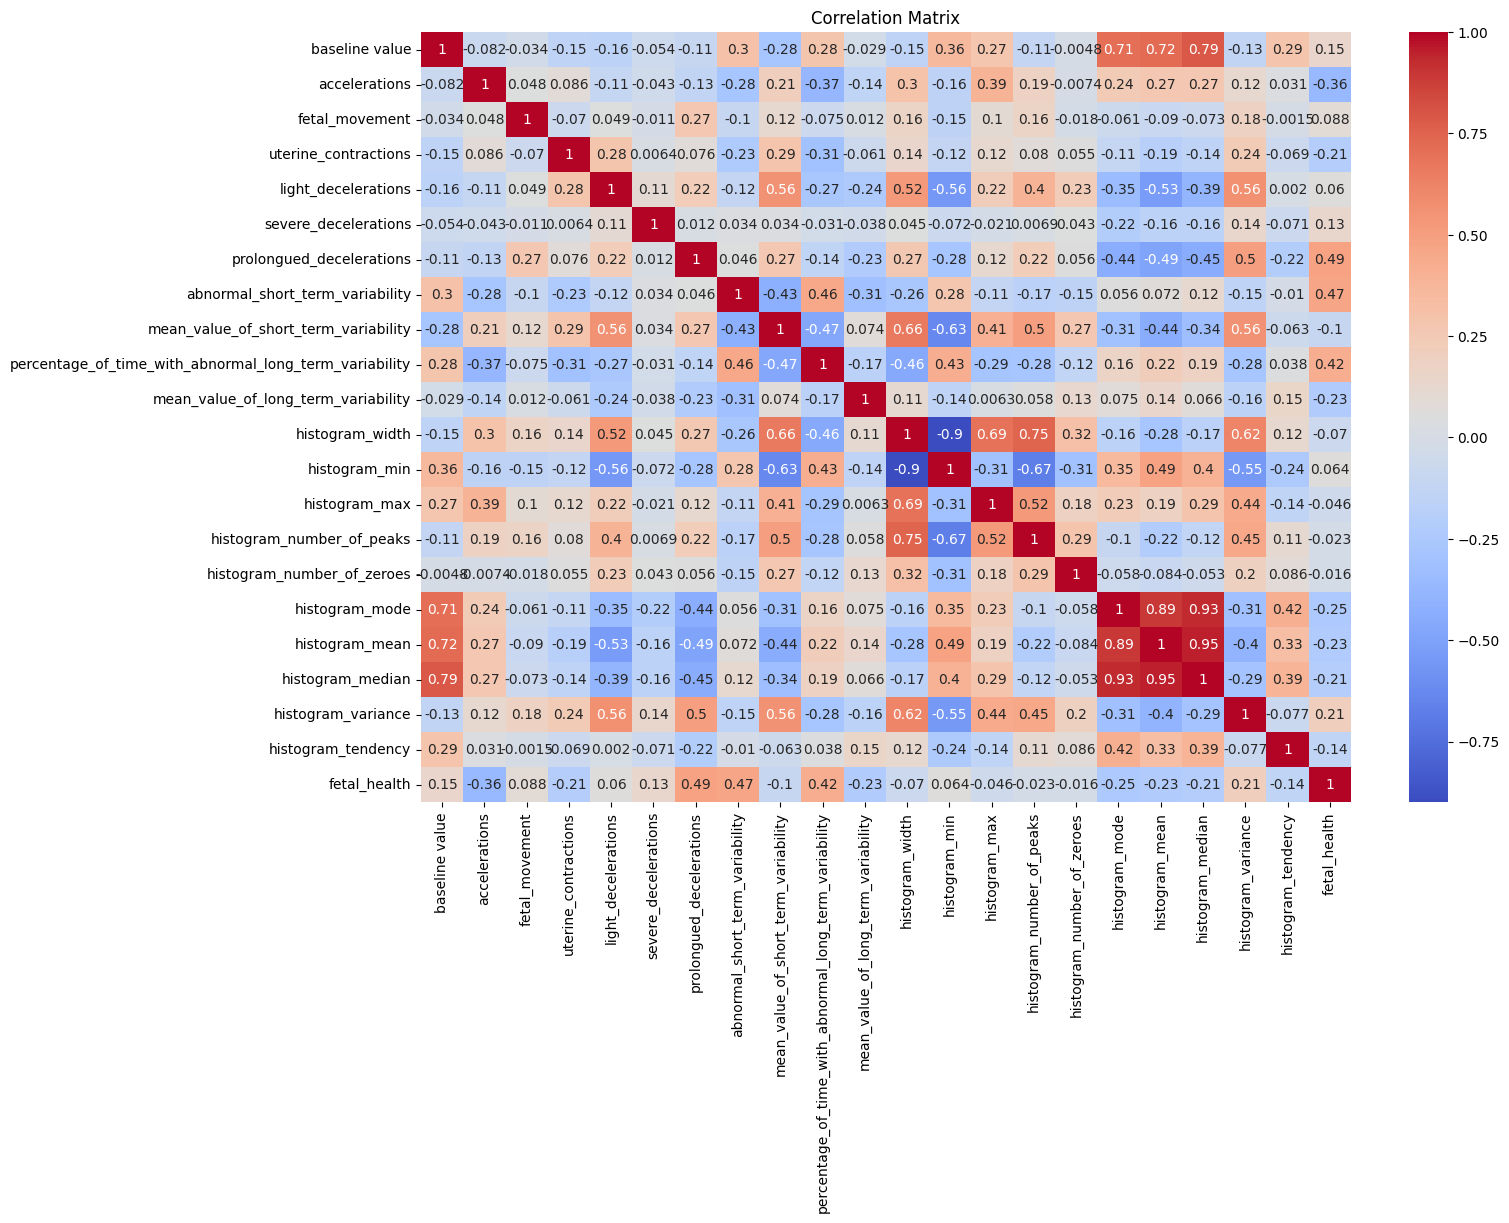

In [52]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#Data Preparation

## Memisahkan antara variabel independen dan variabel dependen serta melakukan splitting data dan augmentasi data untuk menyeimbangkan data latih.

In [53]:
X = df.drop(['fetal_health'],axis = 1)
y = df['fetal_health']

X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 , stratify=y , random_state = 42)

print(X_train.shape , X_test.shape , y_train.shape , y_test.shape)
Scaler = MinMaxScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

smote = SMOTE()
X_train_resampled , y_train_resampled = smote.fit_resample(X_train , y_train)

print(X_train_resampled.shape , X_test.shape , y_train_resampled.shape , y_test.shape)

(1690, 21) (423, 21) (1690,) (423,)
(3948, 21) (423, 21) (3948,) (423,)


# Modeling & Evaluasi

## Membuat fungsi untuk evaluasi performa dari modedl

In [54]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
    print("Precision Score :" , precision_score(y_test, y_pred, average='weighted'))
    print("Recall Score :" , recall_score(y_test, y_pred, average='weighted'))
    print("-"*50)
    sns.heatmap(confusion_matrix(y_test , y_pred) , annot = True ,cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    print("-"*50)
    print("Classification Report:\n", classification_report(y_test, y_pred))

## Melakukan proses training pada model KNN, RF, SVM, dan GB menggunakan data hasil splitting.

In [55]:
model_knn = KNeighborsClassifier()
model_rf = RandomForestClassifier(n_estimators=300,max_depth=2)
model_svm = SVC()
model_gb = GradientBoostingClassifier(learning_rate = 0.1)



## Menampilkan evaluasi dari hasil latih pada masing-masing model

KNN
Accuracy: 0.8794326241134752
F1 Score: 0.8865275191859439
Precision Score : 0.8989834560943185
Recall Score : 0.8794326241134752
--------------------------------------------------


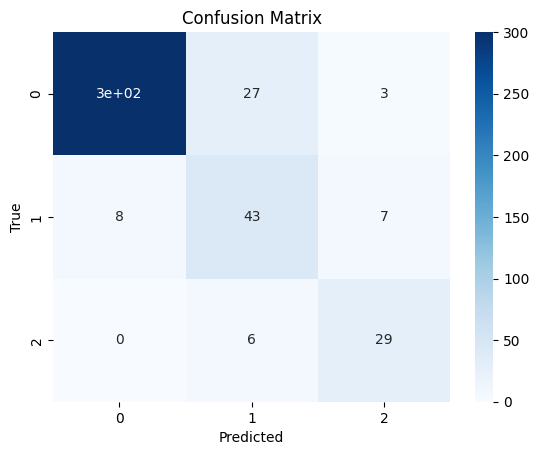

--------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

         1.0       0.97      0.91      0.94       330
         2.0       0.57      0.74      0.64        58
         3.0       0.74      0.83      0.78        35

    accuracy                           0.88       423
   macro avg       0.76      0.83      0.79       423
weighted avg       0.90      0.88      0.89       423

Random Forest
Accuracy: 0.8463356973995272
F1 Score: 0.855767012437331
Precision Score : 0.8737267429083756
Recall Score : 0.8463356973995272
--------------------------------------------------


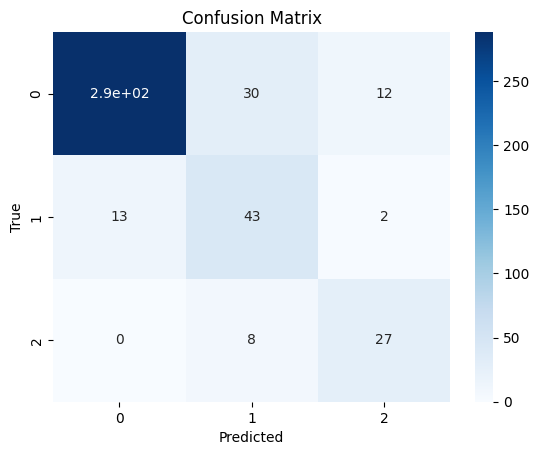

--------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

         1.0       0.96      0.87      0.91       330
         2.0       0.53      0.74      0.62        58
         3.0       0.66      0.77      0.71        35

    accuracy                           0.85       423
   macro avg       0.72      0.80      0.75       423
weighted avg       0.87      0.85      0.86       423

SVM
Accuracy: 0.8888888888888888
F1 Score: 0.8966285585066537
Precision Score : 0.9136296608384242
Recall Score : 0.8888888888888888
--------------------------------------------------


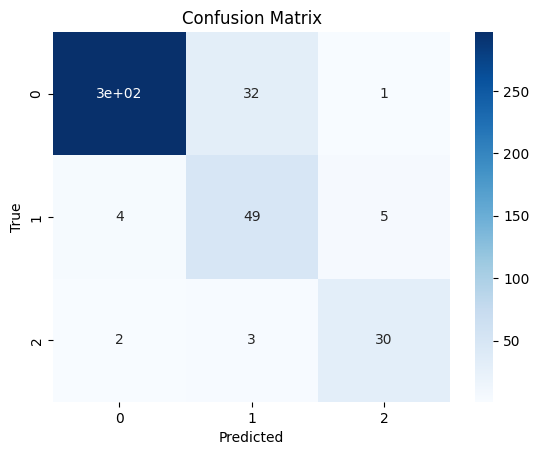

--------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

         1.0       0.98      0.90      0.94       330
         2.0       0.58      0.84      0.69        58
         3.0       0.83      0.86      0.85        35

    accuracy                           0.89       423
   macro avg       0.80      0.87      0.82       423
weighted avg       0.91      0.89      0.90       423

Gradient Boosting
Accuracy: 0.9290780141843972
F1 Score: 0.9281236341381945
Precision Score : 0.9274930959328124
Recall Score : 0.9290780141843972
--------------------------------------------------


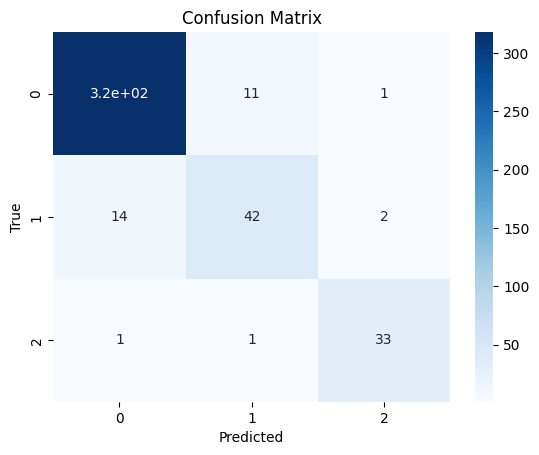

--------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

         1.0       0.95      0.96      0.96       330
         2.0       0.78      0.72      0.75        58
         3.0       0.92      0.94      0.93        35

    accuracy                           0.93       423
   macro avg       0.88      0.88      0.88       423
weighted avg       0.93      0.93      0.93       423



In [56]:
print("KNN")
evaluate_model(model_knn, X_train_resampled , y_train_resampled, X_test, y_test)
print("Random Forest")
evaluate_model(model_rf, X_train_resampled , y_train_resampled, X_test, y_test)
print("SVM")
evaluate_model(model_svm, X_train_resampled , y_train_resampled, X_test, y_test)
print("Gradient Boosting")
evaluate_model(model_gb,X_train_resampled , y_train_resampled, X_test, y_test)